# COMP3330 Project 1b
# Question 1 - Two Spiral Task with Artificial Neural Networks

The two spiral dataset consists of (x,y) coordinates of two alternating spirals, as can be seen in the following image. The aim of this exercise is to train a multilayer perceptron (MLP) to correctly classify an (x,y) coordinate.

![alt text](images/two_spiral.png "Two Spiral Dataset")


Instead of generating the dataset, we will read it from a file that takes the following form:

|    x   |    y   | class |
|:------:|:------:|:-----:|
|  -6.5  |   0.0  |   0   |
|  -6.5  |  -0.0  |   1   |
|  6.314 |  1.256 |   0   |
| -6.314 | -1.256 |   1   |
|   ...  |   ...  |  ...  |

In [1]:
import csv
import tensorflow as tf
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt
import numpy as np
def read_two_spiral_file(filename="datasets/two_spiral_0.5.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y
from random import shuffle
from sklearn.model_selection import train_test_split

def shuffle_data(inp, tar):
    combined = list(zip(inp, tar))
    shuffle(combined)
    return zip(*combined)

filename = ["datasets/two_spiral_3.csv", "datasets/two_spiral_2.csv", "datasets/two_spiral_1.csv", "datasets/two_spiral_0.5.csv", "datasets/two_spiral_0.25.csv"]
density = [3,2,1,0.5,0.25]
index = 2
x_train, y_train = read_two_spiral_file(filename[index])

data_x = [i[0] for i in x_train]
data_y = [i[1] for i in x_train]
plt.scatter(data_x, data_y, color='red')

A multilayered neural network model is built by the next section. We will use 2-4 hidden layers across the different data densities. It will therefore need 3-5 sets of weights (one connecting the input layer to the first hidden layer, another connecting the first hidden layer to the second hidden layer etc.). In this example, the number of hidden layers are manually adjusted as well as the number of hidden units (changing the network's configuration).

In [2]:
# Create the model
x_ = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1])

# Create first layer weights
layer_0_weights = tf.Variable(tf.random_normal([2, 50]))
layer_0_bias = tf.Variable(tf.random_normal([50]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))

# Create second layer weights
layer_1_weights = tf.Variable(tf.random_normal([50, 50]))
layer_1_bias = tf.Variable(tf.random_normal([50]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))

# Create second layer weights
layer_2_weights = tf.Variable(tf.random_normal([50, 40]))
layer_2_bias = tf.Variable(tf.random_normal([40]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))

# Create third layer weights
layer_3_weights = tf.Variable(tf.random_normal([40, 1]))
layer_3_bias = tf.Variable(tf.random_normal([1]))
layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, layer_3_weights), layer_3_bias))

Instructions for updating:
Colocations handled automatically by placer.


The error function and optimizer will be used to train the network.

Training...


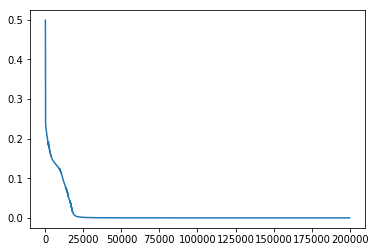

In [19]:
# Define error function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_2))

# Define optimizer and its task (minimise error function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5).minimize(cost)
#optimizer = tf.train.MomentumOptimizer(learning_rate=.5, momentum=0.9).minimize(cost)

N_EPOCHS = 5000 #Increase the number of epochs to about 50000 to get better results. This will take some time for training.

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Training...')

errors = []

# Train
for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: x_train, y_: y_train})
    errors.append(error)
    
plt.plot(errors)
plt.show()       

For this dataset, the trained model is tested and the prediction results are displayed visually. We are going to construct our own test set of coordinates, activate on each coordinate, and then display the activations.

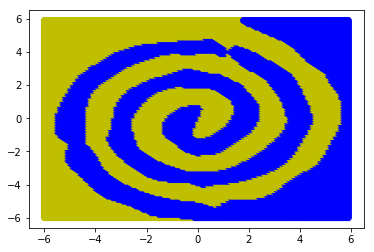

In [20]:
# Visualise activations
activation_range = arange(-6,6,0.1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
classifications = round(sess.run(layer_2, feed_dict={x_:coordinates}))
x, y = meshgrid(activation_range, activation_range)
plt.scatter(x, y, c=['b' if x > 0 else 'y' for x in classifications])
plt.show()